In [1]:
from sai.stats.features import *

In [39]:
import allel
import os
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [3]:
import scipy
import yaml
import numpy as np
from typing import Any
from sai.stats.features import *

from sai.utils import parse_ind_file
from sai.utils.preprocessors import DataPreprocessor
from sai.stats.features import *

import os
import pandas as pd
from multiprocessing import Lock
from sai.utils.multiprocessing import mp_manager
from sai.utils.generators import WindowDataGenerator
from sai.utils.generators import SaiWindowDataGenerator

from sai.utils.generators import WindowGenerator

from sai.preprocess import Sai_lr_preprocess
from sai.preprocess import Sai_lr_process_folder

import sai.utils.gaia_utils

In [4]:
from sai.utils.simulators import MsprimeSimulator
from sai.utils.simulators import SlimSimulatorRacimo

In [5]:
from sai.utils.generators import RandomNumberGenerator

In [6]:
features_yaml = os.path.join("examples", "configs", "SaiFeatureSelectionRacimo.yaml")

In [7]:
chr_name = "1"
win_len = 40000
win_step = 40000
feature_config = features_yaml

In [8]:
nrep = 1000
nprocess = 6
output_dir_sel="racimo_sel"
output_dir_no_sel="racimo_no_sel"



# Simulation of Racimo model with Slim

In [ ]:

simulator = SlimSimulatorRacimo(output_dir=output_dir_sel, scaling_factor=10)

generator = RandomNumberGenerator(nrep=nrep, seed=12345)
res_sel = mp_manager(job=simulator, data_generator=generator, nprocess=nprocess)

# Processing of features for all folders with simulations

In [ ]:
from sai.preprocess import Sai_lr_process_folder_StatProcessor
res_sai_sel = Sai_lr_process_folder_StatProcessor(    vcf_location=output_dir_sel,
    feature_config=feature_config,
    output_dir="results_" + output_dir_sel,
    chr_name=chr_name,
    ref_ind_file=None,
    tgt_ind_file=None,
    win_len=win_len,
    win_step=win_step,
    vcf_ending=".vcf",
    src_ind_file=None,
    nprocess=6)

# Same for simulations w/o selection (but admixture), i.e. selection_coefficient=0.

In [11]:
simulator = SlimSimulatorRacimo(output_dir=output_dir_no_sel, scaling_factor=10, selection_coefficient=0.0)

generator = RandomNumberGenerator(nrep=nrep, seed=12345)
res_no_sel = mp_manager(job=simulator, data_generator=generator, nprocess=nprocess)

res_sai_no_sel = Sai_lr_process_folder_StatProcessor(    vcf_location=output_dir_no_sel,
    feature_config=feature_config,
    output_dir="results_" + output_dir_no_sel,
    chr_name=chr_name,
    ref_ind_file=None,
    tgt_ind_file=None,
    win_len=win_len,
    win_step=win_step,
    vcf_ending=".vcf",
    src_ind_file=None,
    nprocess=6)

In [ ]:
res_sai_no_sel[0]

chr_name  start    end ref_pop tgt_pop src_pop src_pop_list  nsnps  \
0        1      1  40000      p1      p4      p2        (p2,)    226   

   theta_pi_v2|{} tgt_gts_shape  ...  \
0       10.651004    (226, 198)  ...   

  calc_u|val0|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                  0          

  calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                 []          

   calc_u|val0|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                 []           

   calc_u|val0|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}  \
0                                                 []           

   calc_u|val0|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}  Label  \
0                                                 []              0   

                               file  
0  racimo_no_sel/49/slim_sim.49.vcf  

[1 rows x 33 columns]

In [13]:
res_sai_sel[1]

chr_name  start    end ref_pop tgt_pop src_pop src_pop_list  nsnps  \
0        1      1  40000      p1      p4      p2        (p2,)    228   

   theta_pi_v2|{} tgt_gts_shape  ...  \
0        10.79509    (228, 198)  ...   

  calc_u|val0|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                  0          

  calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                 []          

   calc_u|val0|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                 []           

   calc_u|val0|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}  \
0                                                 []           

   calc_u|val0|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}  \
0                                                  0           

   calc_u|val1|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}  Label  \
0                                                 []              1   

                              file  
0  racimo_sel/573/slim_sim.573.vcf  

[1 rows x 33 columns]

In [ ]:
df_sel = pd.concat(res_sai_sel)
df_no_sel = pd.concat(res_sai_no_sel)

In [23]:
df_sel[30:300]

chr_name  start    end ref_pop tgt_pop src_pop src_pop_list  nsnps  \
0         1      1  40000      p1      p4      p2        (p2,)    254   
0         1      1  40000      p1      p4      p2        (p2,)    219   
0         1      1  40000      p1      p4      p2        (p2,)    217   
0         1      1  40000      p1      p4      p2        (p2,)    216   
0         1      1  40000      p1      p4      p2        (p2,)    189   
..      ...    ...    ...     ...     ...     ...          ...    ...   
0         1      1  40000      p1      p4      p2        (p2,)    233   
0         1      1  40000      p1      p4      p2        (p2,)    210   
0         1      1  40000      p1      p4      p2        (p2,)    209   
0         1      1  40000      p1      p4      p2        (p2,)    217   
0         1      1  40000      p1      p4      p2        (p2,)    215   

    theta_pi_v2|{} tgt_gts_shape  ...  \
0        13.548191    (254, 198)  ...   
0         8.009922    (219, 198)  ...   
0        10.724204    (217, 198)  ...   
0         8.859072    (216, 198)  ...   
0         8.259596    (189, 198)  ...   
..             ...           ...  ...   
0        10.417005    (233, 198)  ...   
0         8.483519    (210, 198)  ...   
0         7.594003    (209, 198)  ...   
0         8.058969    (217, 198)  ...   
0         8.496765    (215, 198)  ...   

   calc_u|val0|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                   0          
0                                                   0          
0                                                   0          
0                                                   0          
0                                                   0          
..                                                ...          
0                                                   0          
0                                                   0          
0                                                   0          
0                                                   0          
0                                                   0          

   calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}  \
0                                                  []          
0                                                  []          
0                                                  []          
0                                                  []          
0                                                  []          
..                                                ...          
0                                                  []          
0                                                  []          
0                                                  []          
0                                                  []          
0                                                  []          

    calc_u|val0|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                   0           
0                                                   0           
0                                                   0           
0                                                   0           
0                                                   0           
..                                                ...           
0                                                   0           
0                                                   0           
0                                                   0           
0                                                   0           
0                                                   0           

    calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}  \
0                                                  []           
0                                                  []           
0                                                  []           
0                                                  [] 

# Create a full dataframe (containing simulations with and w/o selection)

In [24]:
df_sel["SelectionSim"] = 1
df_no_sel["SelectionSim"] = 0

In [36]:
df_full = pd.concat([df_sel, df_no_sel])

In [37]:
df_full.columns

Index(['chr_name', 'start', 'end', 'ref_pop', 'tgt_pop', 'src_pop',
       'src_pop_list', 'nsnps', 'theta_pi_v2|{}', 'tgt_gts_shape',
       'ref_gts_shape', 'src_gts_shape',
       'compute_D_plus|{'compute_D_ancestral': False}', 'tajimas_d|{}',
       'theta_W|{}', 'compute_fd|{}', 'compute_ABBA_BABA_D|{}',
       'heterozygosity|{}', 'calc_rd|{}',
       'calc_q|val0|{'w': 0.01, 'y_list': [['=', 1.0]]}',
       'calc_q|val1|{'w': 0.01, 'y_list': [['=', 1.0]]}',
       'calc_q|val0|{'w': 0.1, 'y_list': [['=', 1.0]]}',
       'calc_q|val1|{'w': 0.1, 'y_list': [['=', 1.0]]}',
       'calc_u|val0|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}',
       'calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}',
       'calc_u|val0|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}',
       'calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}',
       'calc_u|val0|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}',
       'calc_u|val1|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}',
       '

In [44]:
df_full['compute_fd|{}']

0    0.404002
0    0.521361
0    0.430923
0    0.652177
0    0.741961
       ...   
0    0.057969
0    0.000000
0    0.000000
0    0.011267
0    0.005407
Name: compute_fd|{}, Length: 2000, dtype: float64

In [105]:
exclude_cols = ['chr_name', 'start', 'end', 'ref_pop', 'tgt_pop', 'src_pop',
       'src_pop_list', 'tgt_gts_shape',
       'ref_gts_shape', 'src_gts_shape','Label',
       'file', 'SelectionSim']  # add more as needed
label_col = 'SelectionSim'

In [106]:
df_full_for_curves = df_full.copy()

# Precision-Recall curves of all computed features

/tmp/ipykernel_8711/3840832371.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', len(prediction_cols))


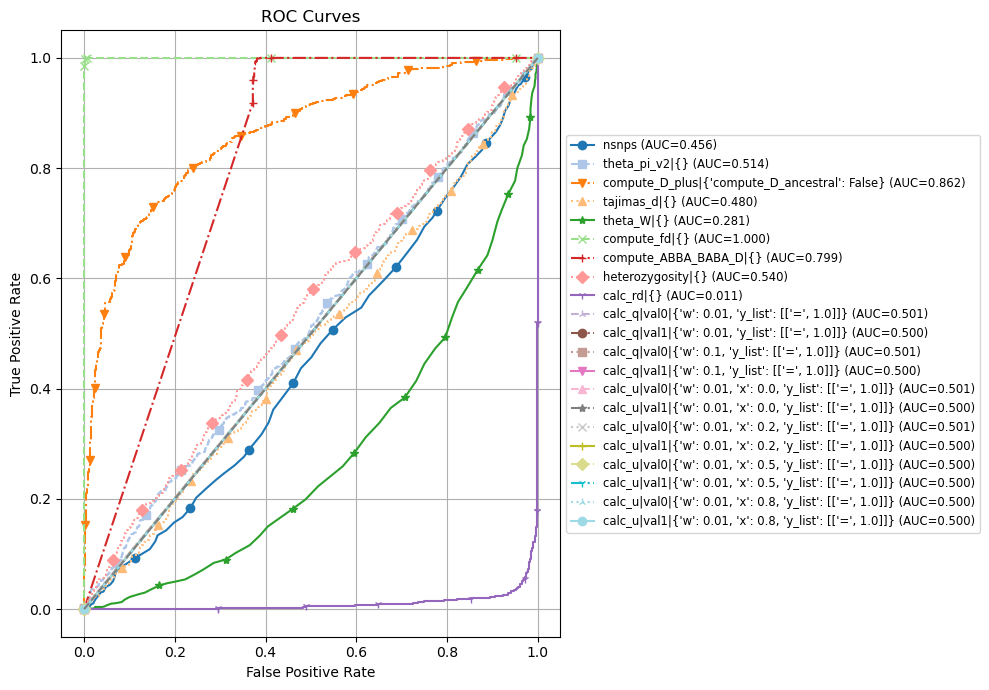

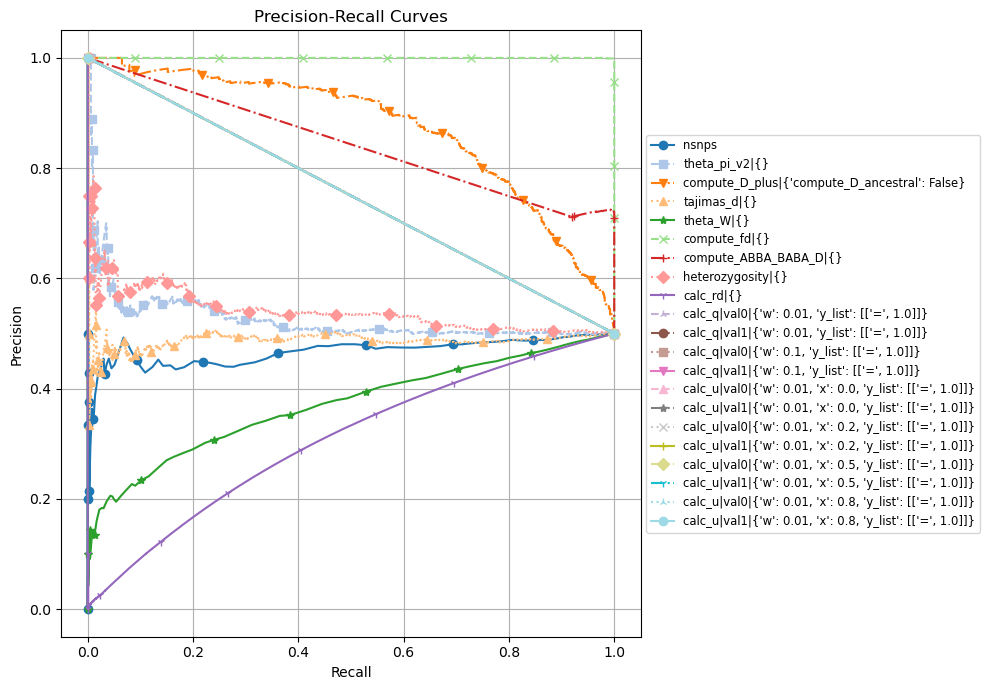

In [123]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np


prediction_cols = [col for col in df_full_for_curves.columns if col not in exclude_cols]
df_full_for_curves[prediction_cols] = df_full_for_curves[prediction_cols].fillna(0.0)

# Color map + line styles + markers
cmap = get_cmap('tab20', len(prediction_cols))
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'v', '^', '*', 'x', '+', 'D', '1', '2']

# Function to get style for each line
def get_style(i):
    color = cmap(i)
    linestyle = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    return color, linestyle, marker

# ROC Curve
plt.figure(figsize=(10, 7))
for i, col in enumerate(prediction_cols):
    fpr, tpr, _ = roc_curve(df_full_for_curves[label_col], df_full_for_curves[col])
    roc_auc = auc(fpr, tpr)
    color, linestyle, marker = get_style(i)
    plt.plot(fpr, tpr, label=f'{col} (AUC={roc_auc:.3f})',
             color=color, linestyle=linestyle, marker=marker, markevery=0.1)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 7))
for i, col in enumerate(prediction_cols):
    precision, recall, _ = precision_recall_curve(df_full_for_curves[label_col], df_full_for_curves[col])
    color, linestyle, marker = get_style(i)
    plt.plot(recall, precision, label=col,
             color=color, linestyle=linestyle, marker=marker, markevery=0.1)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# For better comparison with Maladapt results, I also tried to create curves for percentile ranks (either directly via rankdata, or for custom cut-offs)

/tmp/ipykernel_8711/231740845.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab20', len(prediction_cols))


error with column: calc_q|val1|{'w': 0.01, 'y_list': [['=', 1.0]]}
error with column: calc_q|val1|{'w': 0.1, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}


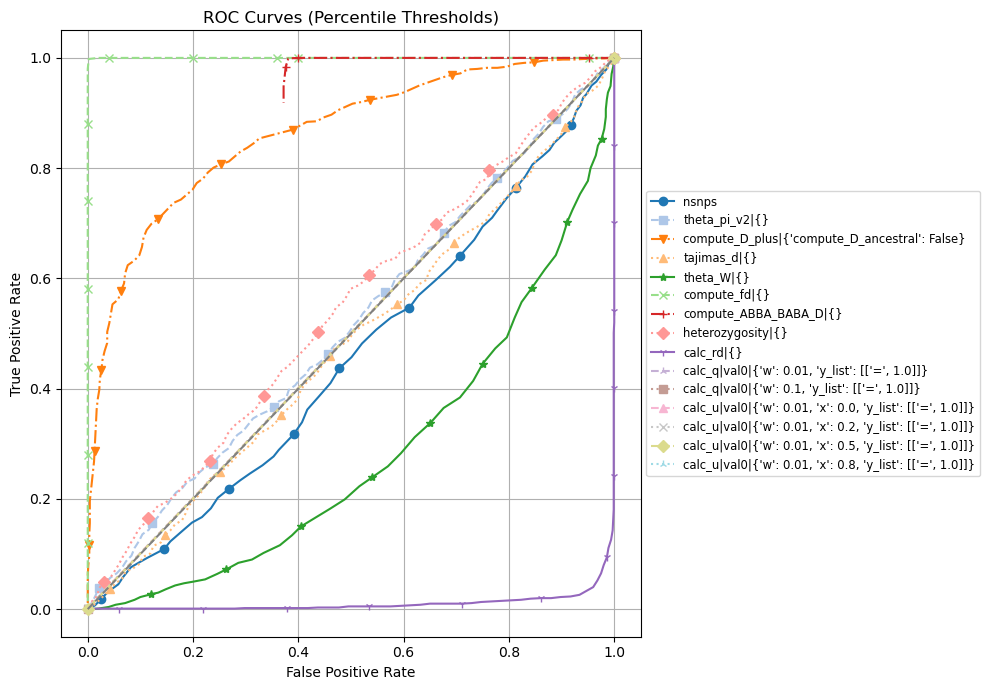

error with column: calc_q|val1|{'w': 0.01, 'y_list': [['=', 1.0]]}
error with column: calc_q|val1|{'w': 0.1, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.0, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.2, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.5, 'y_list': [['=', 1.0]]}
error with column: calc_u|val1|{'w': 0.01, 'x': 0.8, 'y_list': [['=', 1.0]]}


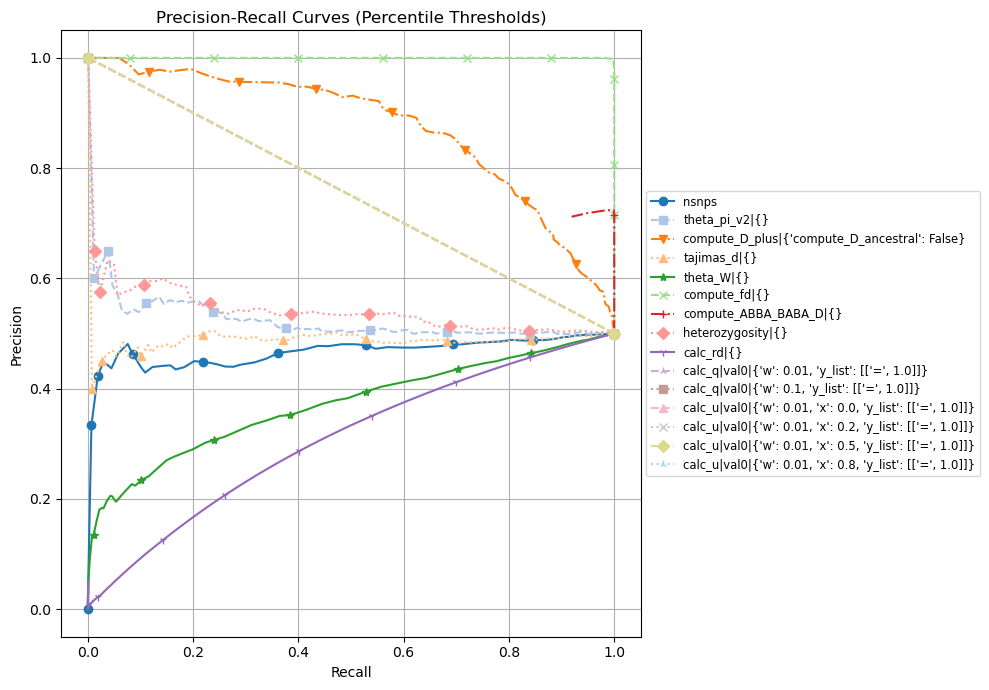

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.cm import get_cmap

def percentile_roc_pr(y_true, y_scores, percentiles=np.linspace(0, 100, 101)):
    
    y_scores = np.nan_to_num(y_scores, nan=0.0, posinf=0.0, neginf=0.0)
    
    thresholds = np.percentile(y_scores, percentiles)
    
    tpr_list, fpr_list = [], []
    precision_list, recall_list = [], []
    
    for thresh in thresholds:

        y_pred = (y_scores >= thresh).astype(int)
        
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 1.0
        recall = tpr
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        precision_list.append(precision)
        recall_list.append(recall)
    
    return fpr_list, tpr_list, precision_list, recall_list, thresholds




prediction_cols = [col for col in df_full_for_curves.columns if col not in exclude_cols]
df_full_for_curves[prediction_cols] = df_full_for_curves[prediction_cols].fillna(0.0)

cmap = get_cmap('tab20', len(prediction_cols))
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'v', '^', '*', 'x', '+', 'D', '1', '2']

def get_style(i):
    color = cmap(i)
    linestyle = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    return color, linestyle, marker

# Plot ROC and PR curves using percentile-based thresholds
plt.figure(figsize=(10, 7))
for i, col in enumerate(prediction_cols):
    try:
        fpr, tpr, precision, recall, thresholds = percentile_roc_pr(df_full_for_curves[label_col].values, df_full_for_curves[col].values)
        color, linestyle, marker = get_style(i)
        plt.plot(fpr, tpr, label=f'{col}', color=color, linestyle=linestyle, marker=marker, markevery=0.1)
    except:
        print(f"error with column: {col}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Percentile Thresholds)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 7))
for i, col in enumerate(prediction_cols):
    try:
        fpr, tpr, precision, recall, thresholds = percentile_roc_pr(df_full_for_curves[label_col].values, df_full_for_curves[col].values)
        color, linestyle, marker = get_style(i)
        plt.plot(recall, precision, label=col, color=color, linestyle=linestyle, marker=marker, markevery=0.1)
    except:
        print(f"error with column: {col}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Percentile Thresholds)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
result_df  = df_full.copy()

In [49]:
label_col

'SelectionSim'

# other visualizations of the relation between the computed features

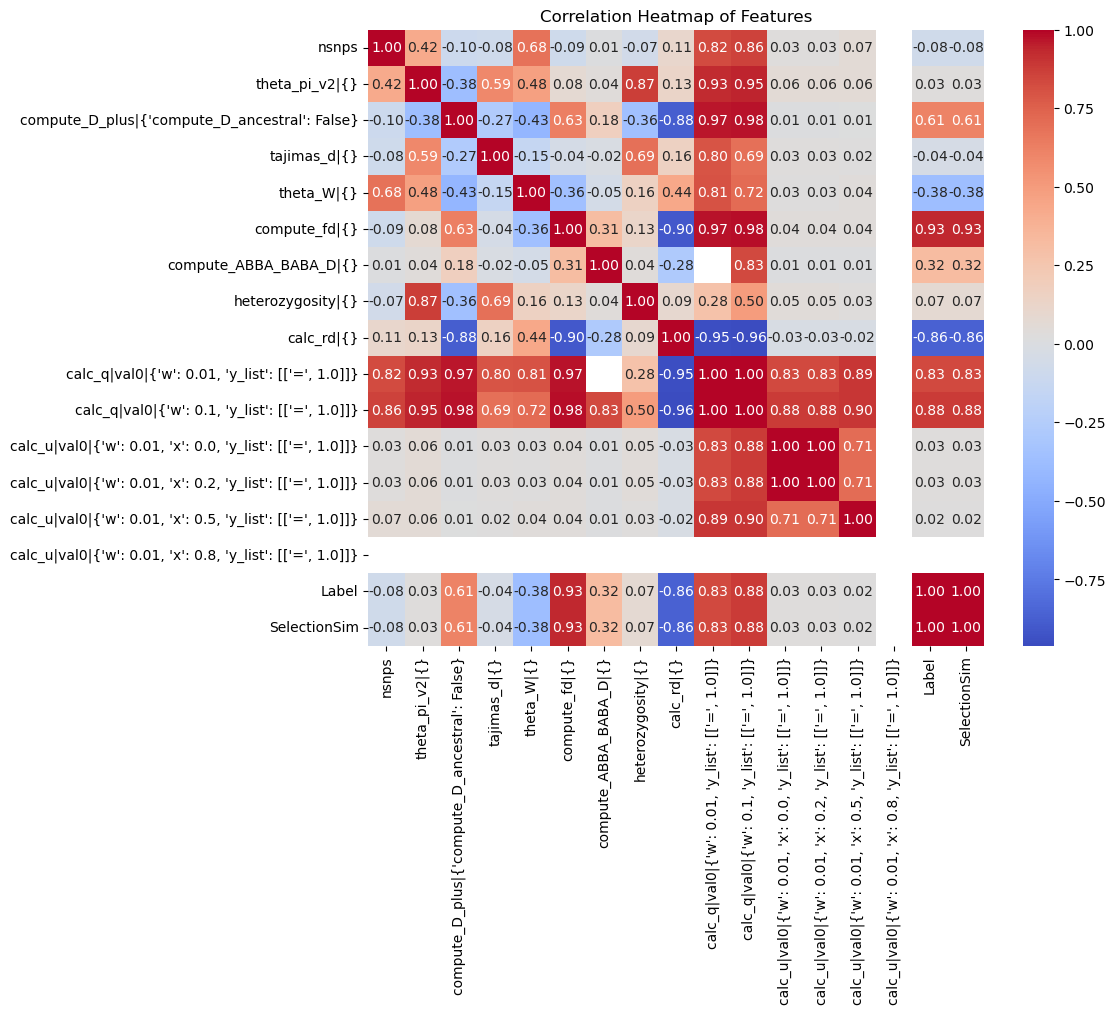

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


filtered_df = result_df.drop(columns=[
    'Chromosome', 'chr_name', 'start', 'end', 'Start','End',#'Introgression',
    'ref_pop', 'tgt_pop', 'src_pop',
    'src_pop_list', 'tgt_gts_shape', 'ref_gts_shape', 'src_gts_shape'
 ],errors='ignore')


numeric_df = filtered_df.apply(pd.to_numeric, errors='coerce')
property_columns = numeric_df.dropna(axis=1, how='all').columns

# correlation matrix
plt.figure(figsize=(10, 8))
#corr_matrix = result_df[property_columns].corr(method="spearman")
corr_matrix = result_df[property_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

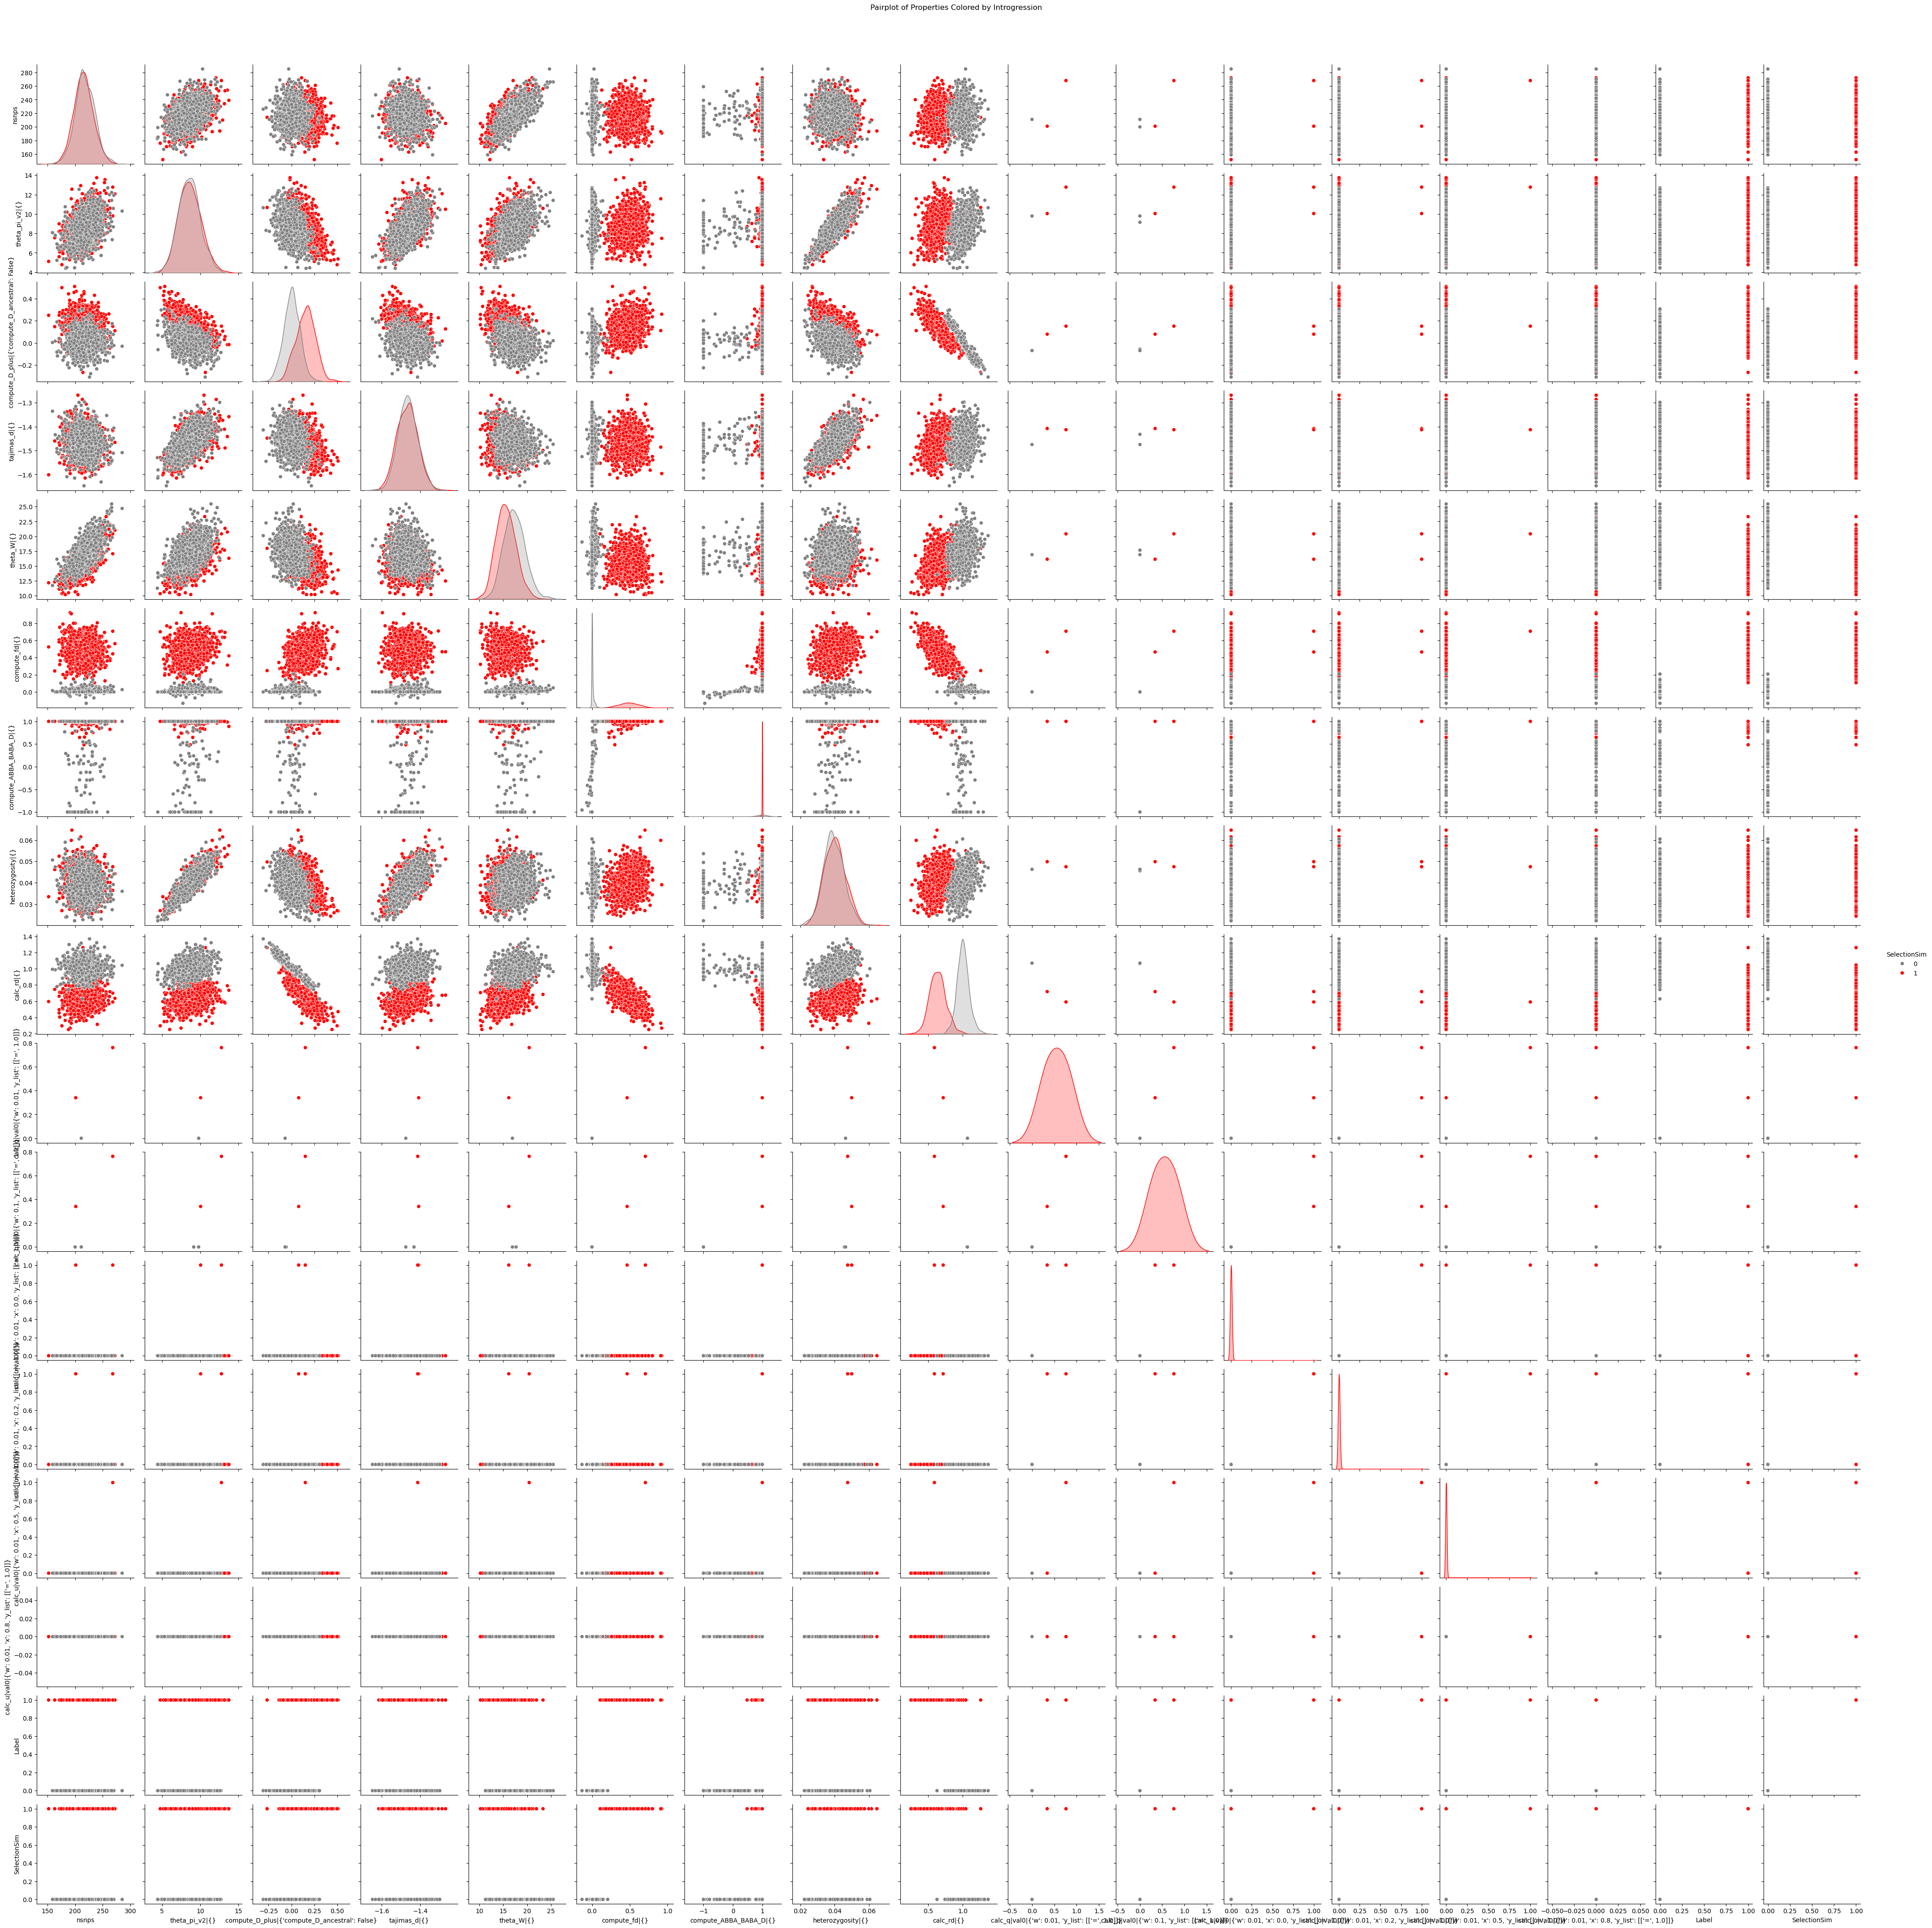

In [58]:
numeric_df = numeric_df.reset_index(drop=True)
sns.pairplot(numeric_df, vars=property_columns, hue=label_col, palette={0: 'gray', 1: 'red'}, diag_kind='kde')
plt.suptitle("Pairplot of Properties Colored by Introgression", y=1.02)
plt.show()

# We can also compute SCCT: In this case, I just chose the SNP in the middle of the 40kb window, i.e. the adaptive SNP in case of simulations with selection
## As expected, in many cases only the ancestral or the derived allel is present at the central SNP


In [66]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.lib.stride_tricks import sliding_window_view

from sai.stats.scct_feature import *

In [ ]:
all_scct_sel_theo = []
for elem in res_sel:

    curr_vcf = elem[0]["vcf_file"]
    full_vcf = load_full_vcf(curr_vcf, chr_name, elem[0]["ref_ind_file"], elem[0]["tgt_ind_file"], src_ind_file=elem[0]["src_ind_file"], ploidy=2, is_phased=True)
    
    full_vcf_tgt_gts = full_vcf[2]
    full_vcf_positions = full_vcf[-1]

    #full_vcf_gts_filtered, full_indices_filtered = filter_zero_rows(full_vcf_tgt_gts, return_indices=True)
    #full_vcf_pos_filtered = np.delete(full_vcf_positions, full_indices_filtered, axis=0)
    
    result = sample_scct(full_vcf_tgt_gts, central_snp=None, theoretical=True, use_log_ratio=False, gts_pos=full_vcf_positions, full_vcf_gts=None, full_vcf_pos=None, set_alpha_1=False)   
    all_scct_sel_theo.append(result)


Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the cent

In [75]:
all_scct_non_sel_theo = []
for elem in res_no_sel:

    curr_vcf = elem[0]["vcf_file"]
    full_vcf = load_full_vcf(curr_vcf, chr_name, elem[0]["ref_ind_file"], elem[0]["tgt_ind_file"], src_ind_file=elem[0]["src_ind_file"], ploidy=2, is_phased=True)
    
    full_vcf_tgt_gts = full_vcf[2]
    full_vcf_positions = full_vcf[-1]
    #print(full_vcf_positions)
    #full_vcf_gts_filtered, full_indices_filtered = filter_zero_rows(full_vcf_tgt_gts, return_indices=True)
    #full_vcf_pos_filtered = np.delete(full_vcf_positions, full_indices_filtered, axis=0)
    
    result = sample_scct(full_vcf_tgt_gts, central_snp=None, theoretical=True, use_log_ratio=False, gts_pos=full_vcf_positions, full_vcf_gts=None, full_vcf_pos=None, set_alpha_1=False)   
    all_scct_non_sel_theo.append(result)

Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the central SNP, return nan
Error: There is either only the ancestral or the derived allel present at the cent

In [88]:
import math

In [93]:
all_scct_non_sel_theo_wo_nan = [x for x in all_scct_non_sel_theo if x != math.isnan(x) and str(x).lower() != 'nan']
all_scct_sel_theo_wo_nan = [x for x in all_scct_sel_theo if x != math.isnan(x) and str(x).lower() != 'nan']

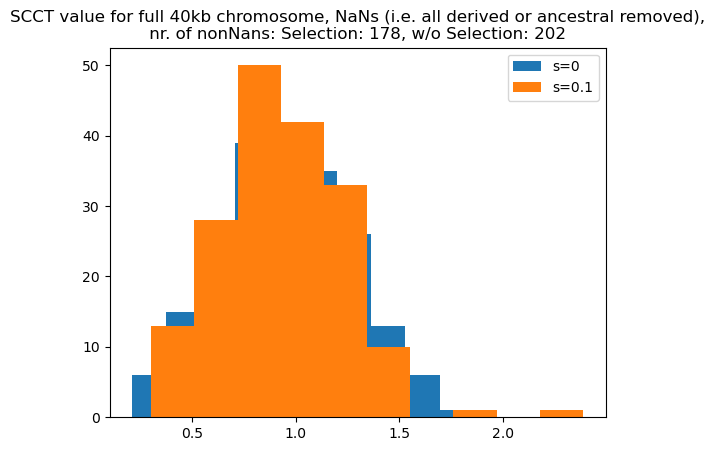

In [101]:
plt.title(f"SCCT value for full 40kb chromosome, NaNs (i.e. all derived or ancestral removed)," \
f"\n nr. of nonNans: Selection: {len(all_scct_sel_theo_wo_nan)}, w/o Selection: {len(all_scct_non_sel_theo_wo_nan)} ")

plt.hist(all_scct_non_sel_theo_wo_nan, label="s=0")
plt.hist(all_scct_sel_theo_wo_nan, label="s=0.1")
plt.legend()